In [1]:
!fuser -k /dev/nvidia[0] 

Specified filename /dev/nvidia[0] does not exist.


In [ ]:
!pip list

In [3]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# Print the current working directory
print("Current working directory:", os.getcwd())

# Manually set the current directory
currentDir = 'C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2'  # Use the absolute path directly

# Print the absolute path of the current directory
print("Absolute path of current directory:", currentDir)

# Directory containing the images
imagesDir = os.path.join(currentDir, 'indoorCVPR_09', 'Images')

# File containing the list of image names
trainImagesFile = os.path.join(currentDir, 'TrainImages.txt')

# Check if the file exists before reading it
if not os.path.isfile(trainImagesFile):
    print(f"File not found: {trainImagesFile}")
else:
    # Read the image names from the file
    with open(trainImagesFile, 'r') as file:
        imageNames = file.read().splitlines()

    # Iterate over each image name and check if it exists in the images directory
    for imageName in imageNames:
        imagePath = os.path.join(imagesDir, imageName)
        if os.path.isfile(imagePath):
            print(f"Image found: {imagePath}")
        else:
            print(f"Image not found: {imageName}")


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
import tensorflow as tf

# Check if a GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPUs available:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU available.")

# Check GPU details
!nvidia-smi


No GPU available.
Sun May 26 13:32:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:09:00.0  On |                  N/A |
|  0%   53C    P8             21W /  160W |     702MiB /   6144MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

data_dir = 'C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/indoorCVPR_09/Images'
# data_dir = '/mnt/c/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/indoorCVPR_09/Images'
batch_size = 32
img_size = (256, 256)

# Load dataset
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Shuffle the dataset
data = data.shuffle(buffer_size=10000, reshuffle_each_iteration=True)

# Function to check image integrity
def preprocess_and_check(image, label):
    try:
        # Ensure the image tensor has the correct shape and type
        image = tf.image.resize(image, img_size)
        image = tf.cast(image, tf.float32) / 255.0
        return image, label
    except tf.errors.InvalidArgumentError:
        print(f"Skipping corrupted image.")
        return tf.zeros(img_size + (3,)), label  # Return a dummy tensor

# Apply the preprocessing and check function
data = data.map(preprocess_and_check, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Visualize some images
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# Scale data
data = data.map(lambda x, y: (x, tf.one_hot(y, 67)), num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Calculate sizes for train, validation, and test sets
dataset_size = len(list(data))
train_size = int(dataset_size * 0.7)
val_size = int(dataset_size * 0.2)
test_size = int(dataset_size * 0.1)

# Split the dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


Found 15617 files belonging to 67 classes.


In [ ]:
# # Function to create the model Modal 2 217/217 ━━━━━━━━━━━━━━━━━━━━ 24s 111ms/step - accuracy: 0.0405 - loss: 4.7407
# Test loss: 4.754802227020264
# Test accuracy: 0.04262672737240791
# def create_model(input_shape, num_classes): TOO COMPLEX
#     model = Sequential()

#     model.add(Conv2D(input_shape=input_shape, filters=64, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2,2)))

#     model.add(Flatten())
#     model.add(Dense(units=2048, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(units=2048, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(units=num_classes, activation="softmax"))

# #     return model

# def create_model(input_shape, num_classes):
#     model = Sequential()

#     model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(3, 3), activation="relu"))
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())

#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())

#     model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())

#     model.add(Flatten())
#     model.add(Dense(units=512, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(units=256, activation="relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(units=num_classes, activation="softmax"))

#     return model

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from keras.regularizers import l2
# def create_model(input_shape, num_classes):
#     model = Sequential()
    
#     # First Convolutional Block
#     model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
#     # Second Convolutional Block
#     model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
    
#     # Third Convolutional Block
#     model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
    
#     # Flatten the convolutional layers' output
#     model.add(Flatten())
    
#     # Fully Connected Layer with MLP
#     model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    
#     # Output Layer
#     model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))
    
#     return model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.preprocessing.image import load_img, img_to_array

def create_model(input_shape, num_classes):A
    model = Sequential()
    
    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    # Flatten the convolutional layers' output
    model.add(Flatten())
    
    # Fully Connected Layer with MLP
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # Output Layer
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))
    
    return model


In [8]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

C:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 67)                  │          17,219 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,788,131 (56.41 MB)

 Trainable params: 14,787,395 (56.41 MB)

 Non-trainable params: 736 (2.88 KB)

Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 410s 1s/step - accuracy: 0.0558 - loss: 11.4311 - val_accuracy: 0.0232 - val_loss: 19.5024 - learning_rate: 1.0000e-04
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.1401 - loss: 9.7308 - val_accuracy: 0.0770 - val_loss: 11.3146 - learning_rate: 1.0000e-04
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.2139 - loss: 8.4665 - val_accuracy: 0.1601 - val_loss: 8.7171 - learning_rate: 1.0000e-04
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.2776 - loss: 7.4532 - val_accuracy: 0.1881 - val_loss: 7.6670 - learning_rate: 1.0000e-04
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.3645 - loss: 6.5955 - val_accuracy: 0.2398 - val_loss: 6.9688 - learning_rate: 1.0000e-04
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.4355 - loss: 5.9584 - val_accuracy: 0.2613 - val_loss: 6.5886 - learning_rate: 1.0000e-04
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - 

48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.8549 - loss: 2.9176
Test loss: 2.922090768814087
Test accuracy: 0.8639323115348816


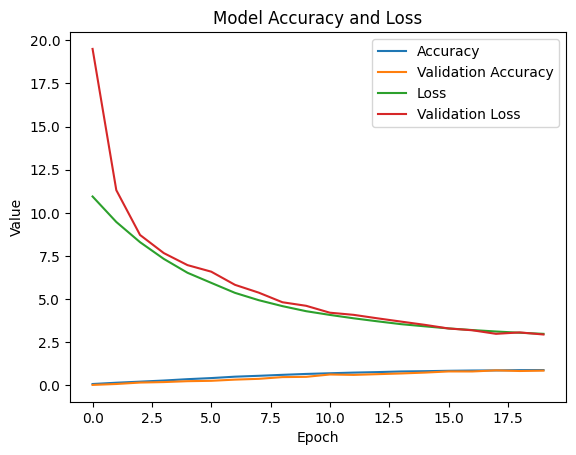

FileNotFoundError: [Errno 2] No such file or directory: 'image.jpeg'

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam

# Parameters
input_shape = (256, 256, 3)
num_classes = 67  # Number of classes in MIT Indoor dataset
epochs = 20  # Starting with 20 epochs

# Create the model
model = create_model(input_shape, num_classes)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(learning_rate=0.0001),  # Adjust learning rate
              metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
hist = model.fit(
    train,
    epochs=epochs,
    validation_data=val,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save("hello.h5")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Plot accuracy and loss
plt.plot(hist.history["accuracy"], label="Accuracy")
plt.plot(hist.history['val_accuracy'], label="Validation Accuracy")
plt.plot(hist.history['loss'], label="Loss")
plt.plot(hist.history['val_loss'], label="Validation Loss")
plt.title("Model Accuracy and Loss")
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.legend()
plt.show()


In [ ]:
#Train !!!

In [1]:
import os

# Define the directory path
directory_path = 'C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/indoorCVPR_09/Images'

# Get the names of the folders in the directory
folder_names = [folder_name for folder_name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder_name))]

# Print the array of folder names
print(folder_names)


['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bar', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'casino', 'children_room', 'church_inside', 'classroom', 'cloister', 'closet', 'clothingstore', 'computerroom', 'concert_hall', 'corridor', 'deli', 'dentaloffice', 'dining_room', 'elevator', 'fastfood_restaurant', 'florist', 'gameroom', 'garage', 'greenhouse', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_bus', 'inside_subway', 'jewelleryshop', 'kindergarden', 'kitchen', 'laboratorywet', 'laundromat', 'library', 'livingroom', 'lobby', 'locker_room', 'mall', 'meeting_room', 'movietheater', 'museum', 'nursery', 'office', 'operating_room', 'pantry', 'poolinside', 'prisoncell', 'restaurant', 'restaurant_kitchen', 'shoeshop', 'stairscase', 'studiomusic', 'subway', 'toystore', 'trainstation', 'tv_studio', 'videostore', 'waitingroom', 'warehouse', 'winecellar']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted class: bedroom


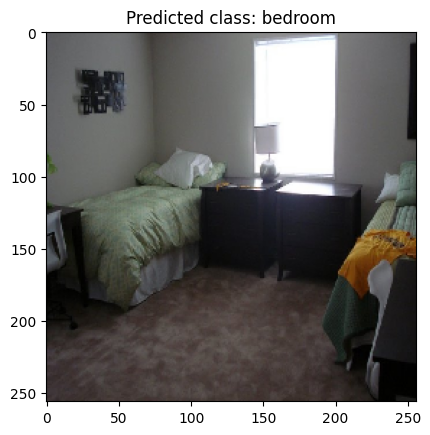

In [11]:
# Load and test the model with an example image

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the class indices
class_indices = {i: class_name for i, class_name in enumerate(folder_names)}

# Function to preprocess the image
def preprocess_image(image_path, img_size=(256, 256)):
    image_img = load_img(image_path, target_size=img_size)
    img = img_to_array(image_img)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Load and preprocess the image
image_path = "C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/TestImages/bedroom/8_cuarto.jpg"  # Replace with your image path
img = preprocess_image(image_path)

# Load the trained model
saved_model = load_model("hello.h5")

# Predict the class of the image
output = saved_model.predict(img)

# Multi-class prediction
predicted_class = class_indices[np.argmax(output)]
print(f"Predicted class: {predicted_class}")

# Visualize the image
plt.imshow(img[0])
plt.title(f"Predicted class: {predicted_class}")
plt.show()


Randomly selected image path: C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/indoorCVPR_09/Images\meeting_room\n457002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted class: meeting_room


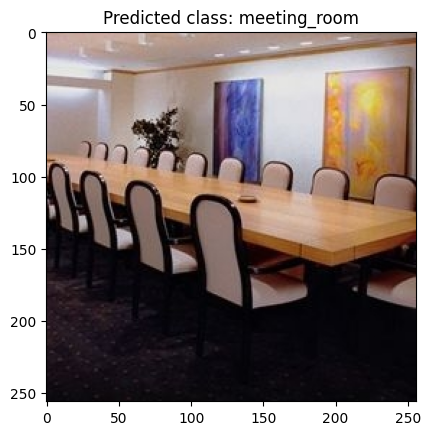

In [5]:
# Do trial with random images
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import random

# Load the class indices
class_indices = {i: class_name for i, class_name in enumerate(folder_names)}

# Function to preprocess the image
def preprocess_image(image_path, img_size=(256, 256)):
    image_img = load_img(image_path, target_size=img_size)
    img = img_to_array(image_img)
    img = tf.image.resize(img, img_size)
    img = tf.cast(img, tf.float32) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to get a random image path from the dataset directory
def get_random_image_path(image_dir):
    class_dirs = [os.path.join(image_dir, class_name) for class_name in os.listdir(image_dir)]
    class_dir = random.choice(class_dirs)
    image_paths = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]
    return random.choice(image_paths)

# Define the path to the image directory
image_dir = 'C:/Users/ahmet/Desktop/YuksekLisans/CompVision/hw2/indoorCVPR_09/Images'

# Get a random image path
image_path = get_random_image_path(image_dir)

# Print the image path
print(f"Randomly selected image path: {image_path}")

# Load and preprocess the image
img = preprocess_image(image_path)

# Load the trained model
saved_model = load_model("hello.h5")

# Predict the class of the image
output = saved_model.predict(img)

# Multi-class prediction
predicted_class = class_indices[np.argmax(output)]
print(f"Predicted class: {predicted_class}")

# Visualize the image
plt.imshow(img[0])
plt.title(f"Predicted class: {predicted_class}")
plt.show()


In [6]:
saved_model = load_model("hello.h5")

In [9]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 563.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 655.4 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 655.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 379.3 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 759.1 kB/s eta 0:00:00


48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 226ms/step


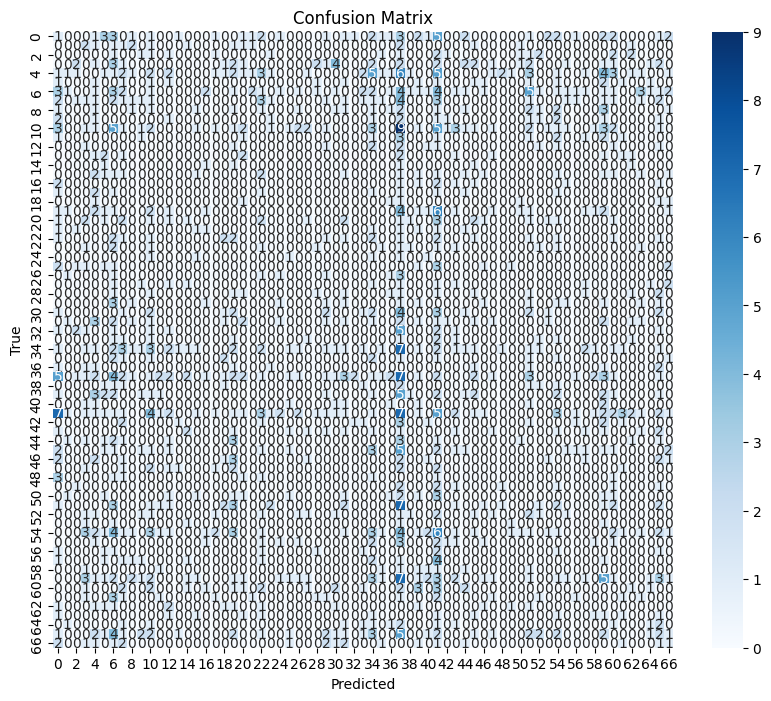

In [10]:
# Get predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_probs = saved_model.predict(test)
y_pred_classes = tf.argmax(y_pred_probs, axis=1).numpy()

# Extract true labels from the test dataset
y_true = []
for images, labels in test:
    y_true.extend(tf.argmax(labels, axis=1).numpy())

y_true = np.array(y_true)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()